# Convolutional neural networks
## First example

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0     

In [4]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 20s 21ms/step - loss: 0.1571 - accuracy: 0.9515
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0454 - accuracy: 0.9857
Epoch 3/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0314 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0181 - accuracy: 0.9944


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 4ms/step - loss: 0.0283 - accuracy: 0.9905


0.9904999732971191

## Training a convnet from scratch on a small dataset
https://www.kaggle.com/competitions/dogs-vs-cats/data

In [9]:
import os, shutil, pathlib
original_dir = pathlib.Path("dogs-vs-cats/train/train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

print(original_dir)

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

dogs-vs-cats\train\train


In [25]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 41, 41, 128)       7385

In [26]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [27]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
    )

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32
    )

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [28]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [29]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras",
                                             save_best_only=True,
                                             monitor="val_loss")
]

In [30]:
history = model.fit(train_dataset,
                    epochs=30,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 47s 729ms/step - loss: 0.8129 - accuracy: 0.5305 - val_loss: 0.6906 - val_accuracy: 0.5210
Epoch 2/30
63/63 [==============================] - 46s 727ms/step - loss: 0.6985 - accuracy: 0.5535 - val_loss: 0.6964 - val_accuracy: 0.5020
Epoch 3/30
63/63 [==============================] - 50s 796ms/step - loss: 0.7007 - accuracy: 0.5955 - val_loss: 0.6662 - val_accuracy: 0.5440
Epoch 4/30
63/63 [==============================] - 48s 763ms/step - loss: 0.6514 - accuracy: 0.6365 - val_loss: 0.6741 - val_accuracy: 0.5880
Epoch 5/30
63/63 [==============================] - 47s 744ms/step - loss: 0.6078 - accuracy: 0.6815 - val_loss: 0.5632 - val_accuracy: 0.7010
Epoch 6/30
63/63 [==============================] - 51s 814ms/step - loss: 0.5519 - accuracy: 0.7190 - val_loss: 0.8893 - val_accuracy: 0.5770
Epoch 7/30
63/63 [==============================] - 49s 771ms/step - loss: 0.5245 - accuracy: 0.7355 - val_loss: 0.5792 - val_accuracy: 0.7120

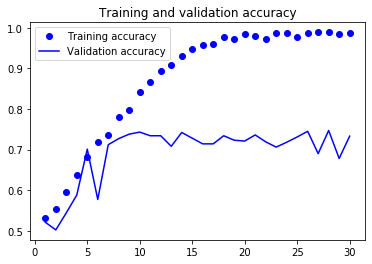

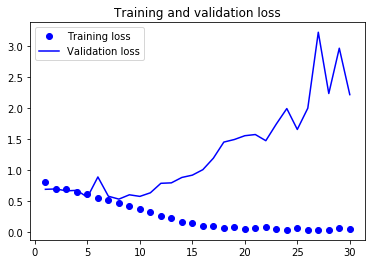

In [31]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [32]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 12s 183ms/step - loss: 0.5778 - accuracy: 0.7100
Test accuracy: 0.710


## Using data augmentation

In [33]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
    )

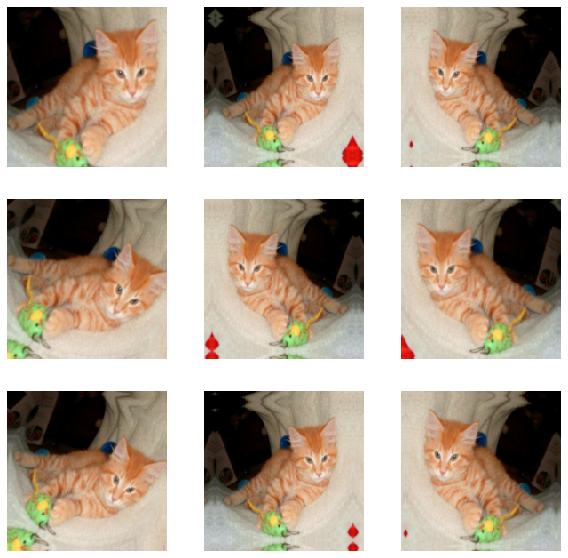

In [34]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [35]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [36]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
        train_dataset,
        epochs=100,
        validation_data=validation_dataset,
        callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 51s 791ms/step - loss: 0.7267 - accuracy: 0.4915 - val_loss: 0.6917 - val_accuracy: 0.6230
Epoch 2/100
63/63 [==============================] - 50s 800ms/step - loss: 0.6930 - accuracy: 0.5400 - val_loss: 0.6795 - val_accuracy: 0.5180
Epoch 3/100
63/63 [==============================] - 51s 801ms/step - loss: 0.6879 - accuracy: 0.5680 - val_loss: 0.6647 - val_accuracy: 0.6110
Epoch 4/100
63/63 [==============================] - 51s 801ms/step - loss: 0.6626 - accuracy: 0.6150 - val_loss: 0.6372 - val_accuracy: 0.6020
Epoch 5/100
63/63 [==============================] - 52s 828ms/step - loss: 0.6468 - accuracy: 0.6250 - val_loss: 0.8925 - val_accuracy: 0.5200
Epoch 6/100
63/63 [==============================] - 51s 807ms/step - loss: 0.6247 - accuracy: 0.6500 - val_loss: 0.6271 - val_accuracy: 0.6260
Epoch 7/100
63/63 [==============================] - 50s 789ms/step - loss: 0.6017 - accuracy: 0.6920 - val_loss: 1.2491 - val_accuracy:

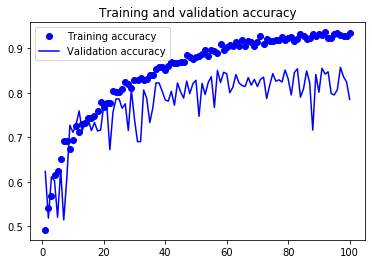

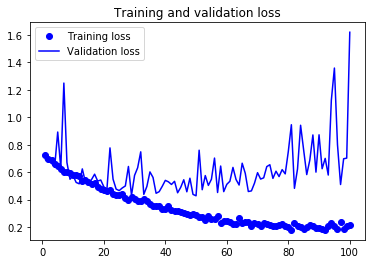

In [71]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [73]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
        train_dataset,
        epochs=50,
        validation_data=validation_dataset,
        callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 51s 797ms/step - loss: 0.6935 - accuracy: 0.5135 - val_loss: 1.5453 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 50s 795ms/step - loss: 0.7408 - accuracy: 0.5525 - val_loss: 0.6867 - val_accuracy: 0.5190
Epoch 3/50
63/63 [==============================] - 49s 775ms/step - loss: 0.6889 - accuracy: 0.5795 - val_loss: 0.6531 - val_accuracy: 0.5740
Epoch 4/50
63/63 [==============================] - 49s 781ms/step - loss: 0.6711 - accuracy: 0.6250 - val_loss: 0.7030 - val_accuracy: 0.5230
Epoch 5/50
63/63 [==============================] - 49s 778ms/step - loss: 0.6406 - accuracy: 0.6410 - val_loss: 0.6741 - val_accuracy: 0.5680
Epoch 6/50
63/63 [==============================] - 49s 770ms/step - loss: 0.6199 - accuracy: 0.6755 - val_loss: 0.6093 - val_accuracy: 0.6850
Epoch 7/50
63/63 [==============================] - 49s 771ms/step - loss: 0.6196 - accuracy: 0.6610 - val_loss: 0.6246 - val_accuracy: 0.6310

In [74]:
model.evaluate(test_dataset)

63/63 [==============================] - 10s 158ms/step - loss: 0.5258 - accuracy: 0.7950


[0.525817334651947, 0.7950000166893005]

## Pretrained VGG16

In [75]:
conv_part_model = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3)
)

58900480/58889256 [==============================] - 9s 0us/step


In [76]:
conv_part_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

VGG16 feature extraction and classification by sequential

In [77]:
import numpy as np

def get_features_labels(dataset):
    all_features = []
    all_labels = []
    
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_part_model.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [78]:
train_features, train_labels = get_features_labels(train_dataset)
val_features, val_labels = get_features_labels(validation_dataset)
test_features, test_labels = get_features_labels(test_dataset)

In [79]:
train_features.shape, train_labels.shape

((2000, 5, 5, 512), (2000,))

In [80]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [81]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 30ms/step - loss: 13.5323 - accuracy: 0.9335 - val_loss: 7.1883 - val_accuracy: 0.9520
Epoch 2/20
63/63 [==============================] - 2s 29ms/step - loss: 6.6463 - accuracy: 0.9630 - val_loss: 5.4330 - val_accuracy: 0.9710
Epoch 3/20
63/63 [==============================] - 2s 28ms/step - loss: 2.2920 - accuracy: 0.9815 - val_loss: 16.0240 - val_accuracy: 0.9390
Epoch 4/20
63/63 [==============================] - 2s 29ms/step - loss: 1.4158 - accuracy: 0.9900 - val_loss: 6.9102 - val_accuracy: 0.9640
Epoch 5/20
63/63 [==============================] - 2s 29ms/step - loss: 0.5698 - accuracy: 0.9945 - val_loss: 7.3453 - val_accuracy: 0.9660
Epoch 6/20
63/63 [==============================] - 2s 32ms/step - loss: 0.2231 - accuracy: 0.9970 - val_loss: 6.0382 - val_accuracy: 0.9650
Epoch 7/20
63/63 [==============================] - 2s 31ms/step - loss: 0.6604 - accuracy: 0.9940 - val_loss: 5.5215 - val_accuracy: 0.9730
Epoch 8/20


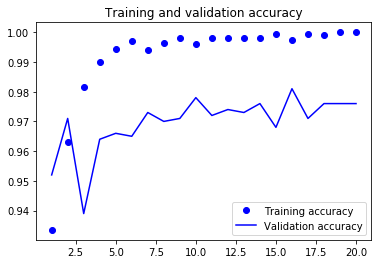

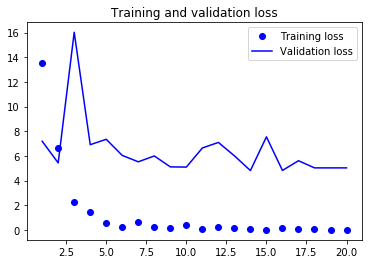

In [83]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

One model with data augmentation

In [87]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

In [88]:
conv_part_model.trainable = False

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_part_model(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')

In [90]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 32ms/step - loss: 0.0234 - accuracy: 0.9995 - val_loss: 6.5224 - val_accuracy: 0.9700
Epoch 2/20
63/63 [==============================] - 2s 29ms/step - loss: 0.0940 - accuracy: 0.9990 - val_loss: 7.1287 - val_accuracy: 0.9690
Epoch 3/20
63/63 [==============================] - 2s 29ms/step - loss: 0.0235 - accuracy: 0.9995 - val_loss: 7.1416 - val_accuracy: 0.9750
Epoch 4/20
63/63 [==============================] - 2s 29ms/step - loss: 2.0281e-34 - accuracy: 1.0000 - val_loss: 7.1416 - val_accuracy: 0.9750
Epoch 5/20
63/63 [==============================] - 2s 28ms/step - loss: 0.0825 - accuracy: 0.9990 - val_loss: 6.7313 - val_accuracy: 0.9760
Epoch 6/20
63/63 [==============================] - 2s 29ms/step - loss: 2.4867e-12 - accuracy: 1.0000 - val_loss: 6.7294 - val_accuracy: 0.9760
Epoch 7/20
63/63 [==============================] - 2s 30ms/step - loss: 0.0253 - accuracy: 0.9995 - val_loss: 8.2899 - val_accuracy: 0.9680
Epoch

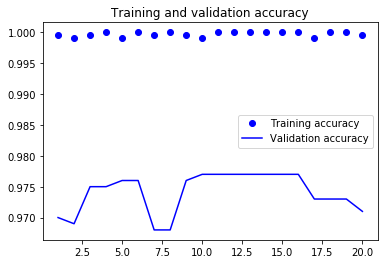

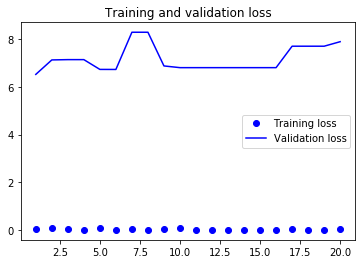

In [91]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()